# Assignment 3: Melbourne Housing project

## I. Introduction

The main target of the project is to apply linear regression model

Specifically, the task is to predict housing prices in Melbourne

## II. Datasets description

This data was scraped from publicly available results posted every week from Domain.com.au. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

https://www.kaggle.com/anthonypino/melbourne-housing-market

## III. Content

### 1.Exploratory Data Analysis:

In [1]:
import pandas as pd # for data analysis
import numpy as np # for numeric calculation
from matplotlib import pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from yellowbrick.regressor import residuals_plot,  ResidualsPlot

In [3]:
original_data = pd.read_csv('Melbourne_housing_FULL.csv')

In [4]:
original_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
original_data.shape

(34857, 21)

In [6]:
original_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [7]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [8]:
# Missing value of columns

missing_val_count_by_column = (original_data.isnull().sum())
print(missing_val_count_by_column)

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64


In [9]:
cols_with_missing = [col for col in original_data.columns 
                                 if original_data[col].isnull().any()]
print(cols_with_missing)

['Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']


In [60]:
data_not_missing_value = original_data.drop(columns = ['BuildingArea', 'YearBuilt'])
data_not_missing_value.shape

(34857, 19)

In [61]:
# replace missing value by mean value

data_not_missing_value['Price'].fillna(data_not_missing_value['Price'].mean(), inplace= True)
data_not_missing_value['Bathroom'].fillna(data_not_missing_value['Bathroom'].value_counts().index[0], inplace= True)
data_not_missing_value['Car'].fillna(data_not_missing_value['Car'].value_counts().index[0], inplace= True)
data_not_missing_value['Landsize'].fillna(data_not_missing_value['Landsize'].mean(), inplace= True)
data_not_missing_value['Bedroom2'].fillna(data_not_missing_value['Bedroom2'].mean(), inplace= True)
data_not_missing_value['Distance'].fillna(data_not_missing_value['Distance'].mean(), inplace= True)
data_not_missing_value['Postcode'].fillna(data_not_missing_value['Postcode'].mean(), inplace= True)
data_not_missing_value['Lattitude'].fillna(data_not_missing_value['Lattitude'].mean(), inplace= True)
data_not_missing_value['Longtitude'].fillna(data_not_missing_value['Longtitude'].mean(), inplace= True)
data_not_missing_value['Regionname'].fillna(data_not_missing_value['Regionname'], inplace= True)

data_not_missing_value = data_not_missing_value.dropna()

In [62]:
data_not_missing_value.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [63]:
data_not_missing_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34854 entries, 0 to 34856
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34854 non-null  object 
 1   Address        34854 non-null  object 
 2   Rooms          34854 non-null  int64  
 3   Type           34854 non-null  object 
 4   Price          34854 non-null  float64
 5   Method         34854 non-null  object 
 6   SellerG        34854 non-null  object 
 7   Date           34854 non-null  object 
 8   Distance       34854 non-null  float64
 9   Postcode       34854 non-null  float64
 10  Bedroom2       34854 non-null  float64
 11  Bathroom       34854 non-null  float64
 12  Car            34854 non-null  float64
 13  Landsize       34854 non-null  float64
 14  CouncilArea    34854 non-null  object 
 15  Lattitude      34854 non-null  float64
 16  Longtitude     34854 non-null  float64
 17  Regionname     34854 non-null  object 
 18  Proper

<AxesSubplot:>

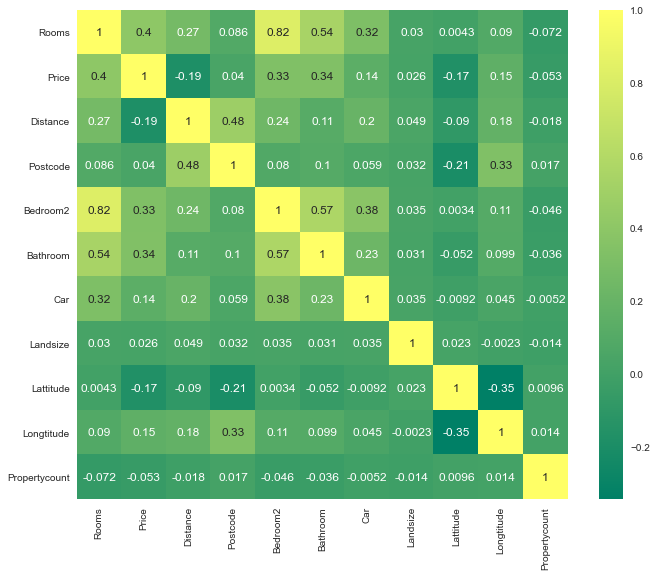

In [14]:
corelation = data_not_missing_value.corr()
plt.figure(figsize = (11,9))
sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels = corelation.columns, annot = True, cmap = 'summer')

Text(0, 0.5, 'Suburb')

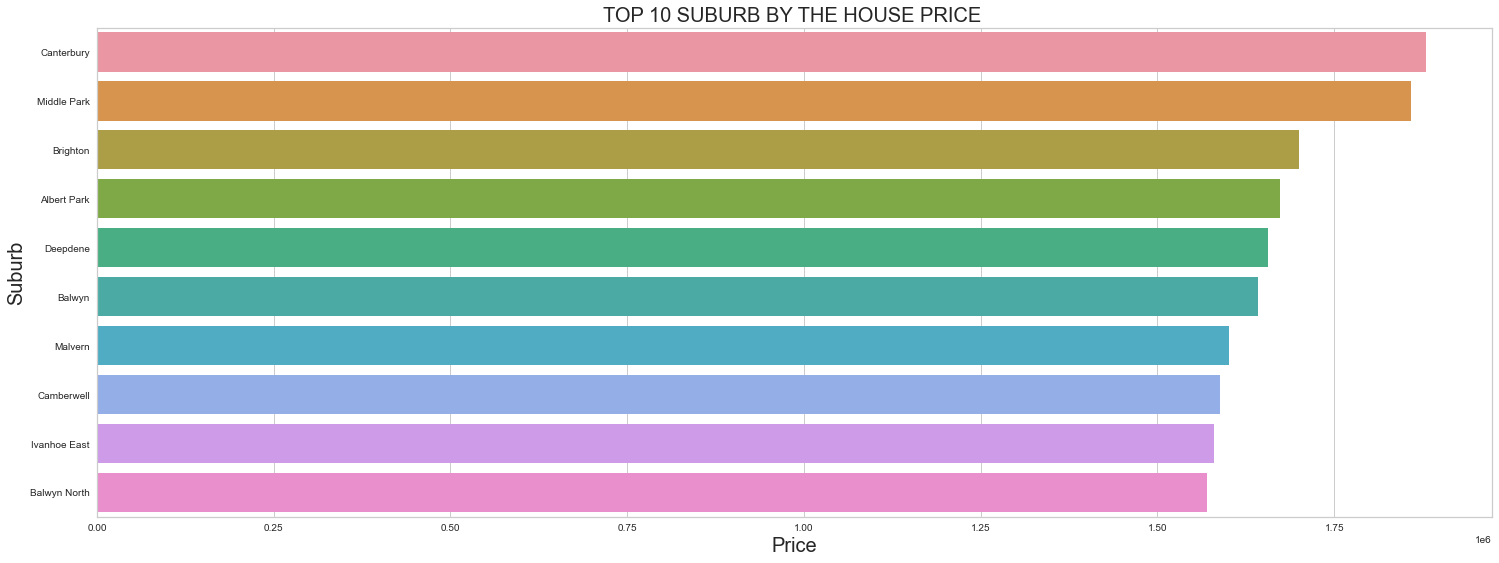

In [15]:
# top 10 suburb by the house price

p_mean = data_not_missing_value.groupby(['Suburb'])['Price'].agg(np.mean).reset_index()
p_mean

p_mean.sort_values(by = ['Price'], inplace = True, ascending = False)

plt.figure(figsize = (25,9))
graph = sns.barplot(x = 'Price', y = 'Suburb', data = p_mean.head(10))
graph.set_title("TOP 10 SUBURB BY THE HOUSE PRICE ", fontsize = 20)
graph.set_xlabel('Price', fontsize = 20)
graph.set_ylabel('Suburb', fontsize = 20)

In [16]:
data_not_missing_value['Suburb'].value_counts().head(5)

Reservoir         844
Bentleigh East    583
Richmond          552
Glen Iris         491
Preston           485
Name: Suburb, dtype: int64

<AxesSubplot:xlabel='Rooms', ylabel='count'>

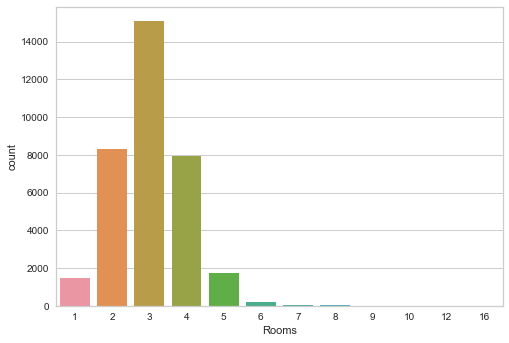

In [17]:
sns.countplot(x='Rooms', data = data_not_missing_value)

Houses with 3 rooms make up the majority of the total number of houses 

<AxesSubplot:xlabel='Rooms', ylabel='Price'>

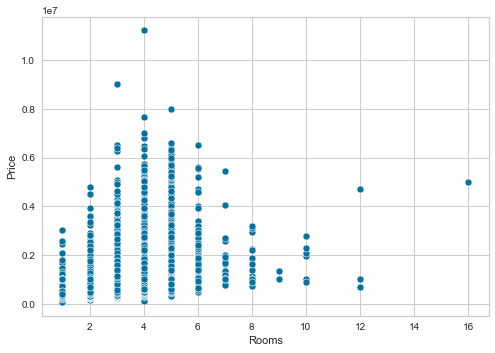

In [18]:
sns.scatterplot(x="Rooms", y="Price",data=data_not_missing_value)

The number of rooms in the house affects the house price 

In [19]:
data_not_missing_value['SellerG'].value_counts().head(5)

Jellis           3358
Nelson           3236
Barry            3235
hockingstuart    2623
Marshall         2027
Name: SellerG, dtype: int64

<AxesSubplot:xlabel='Price', ylabel='Count'>

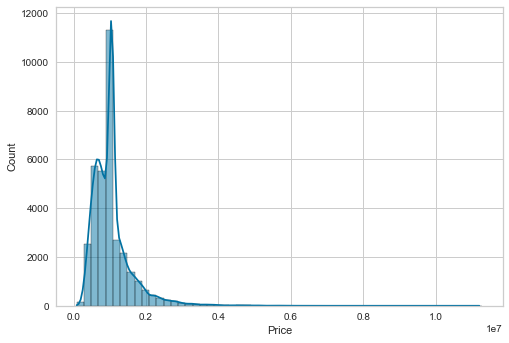

In [20]:
sns.histplot(data=data_not_missing_value, x='Price', binwidth = 200000, kde=True)

House prices are mainly distributed in the range of 0.0 to 0.2. The most number of house with 0.05e7

<AxesSubplot:xlabel='Type', ylabel='count'>

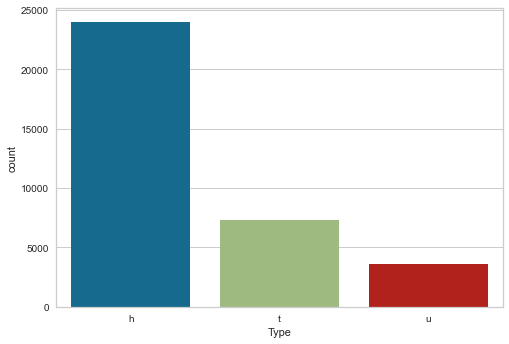

In [21]:
# h: house; t: townhouse; u: unit
labels = ['h', 't', 'u']
g = sns.countplot(data=data_not_missing_value, x='Type')
g.set_xticklabels(labels)
g

Most of the houses are of type H

<AxesSubplot:xlabel='Distance', ylabel='Price'>

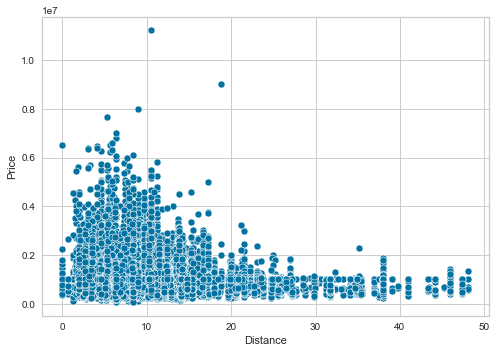

In [22]:
sns.scatterplot(x="Distance", y="Price",data=data_not_missing_value)

Distance has an effect on house price. The big distance is low house price. 
In the dataset, there are many houses with distance less than 20 km

<AxesSubplot:xlabel='Bedroom2', ylabel='Price'>

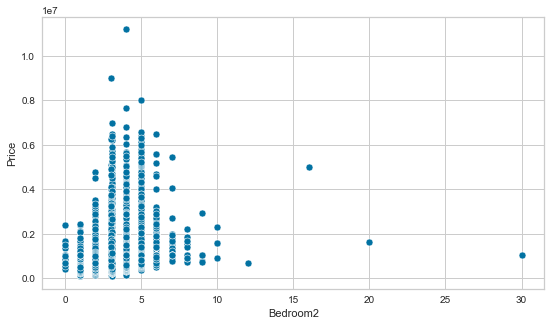

In [23]:
plt.figure(figsize = (9,5))
sns.scatterplot(x="Bedroom2", y="Price",data = data_not_missing_value)

In the dataset, there are many houses with bedroom2 less than 10 rooms. Bedroom2 has an effect on house price

<AxesSubplot:xlabel='Bathroom', ylabel='Price'>

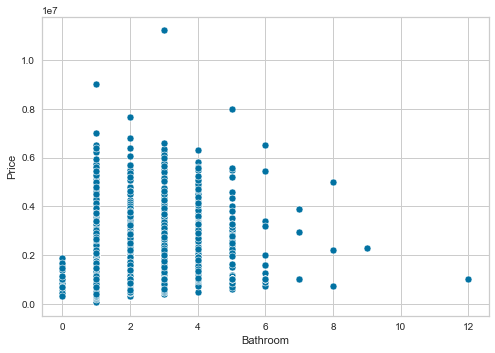

In [24]:
sns.scatterplot(x="Bathroom", y="Price",data = data_not_missing_value)

<AxesSubplot:xlabel='Car', ylabel='Price'>

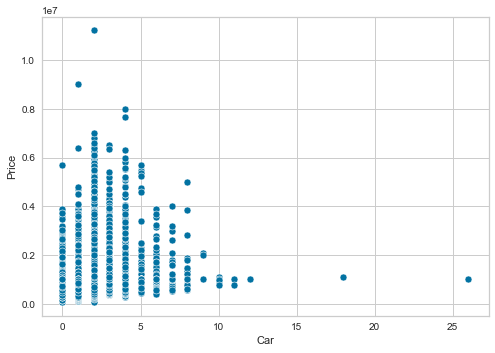

In [25]:
sns.scatterplot(x="Car", y="Price",data=data_not_missing_value)

<AxesSubplot:xlabel='Lattitude', ylabel='Price'>

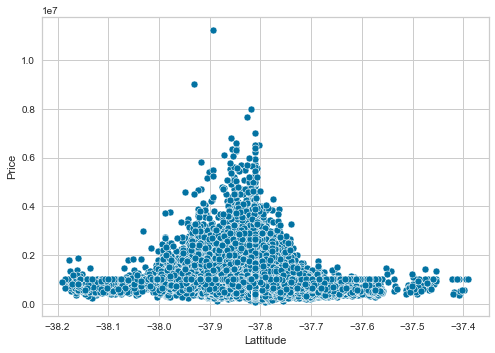

In [26]:
sns.scatterplot(x="Lattitude", y="Price",data=data_not_missing_value)

<AxesSubplot:xlabel='Longtitude', ylabel='Price'>

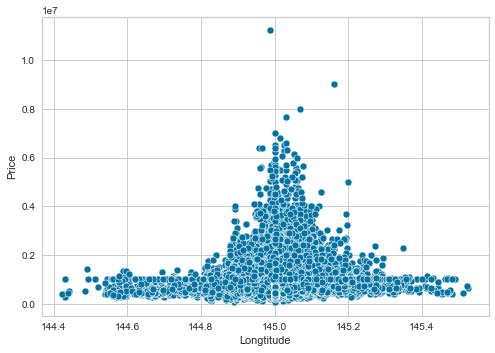

In [27]:
sns.scatterplot(x="Longtitude", y="Price",data = data_not_missing_value)

<AxesSubplot:xlabel='Propertycount', ylabel='Price'>

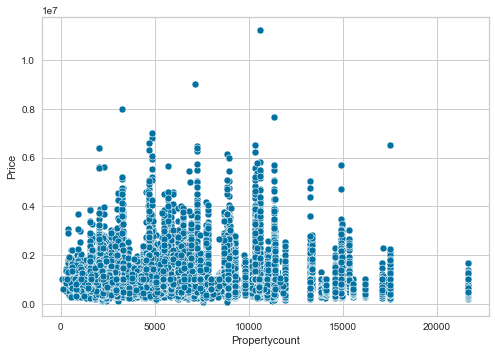

In [28]:
sns.scatterplot(x="Propertycount", y="Price",data=data_not_missing_value)

### 2. Apply the model for prediction with holdout and cross validation

In [156]:
# Feature Engineering

df1 = data_not_missing_value.copy()
df1.drop(['Date', 'Address'], axis=1, inplace=True)

gen_onehot_features = pd.get_dummies(df1, columns = [ 'Type', 'Method','CouncilArea', 'Regionname',
                                                     'Suburb', 'SellerG', 'Postcode'], drop_first=True)

df1 = pd.concat([df1[[]], gen_onehot_features], axis=1)
#df1.drop(['Type', 'Method','CouncilArea', 'Regionname','Suburb', 'SellerG', 'Postcode', ], axis = 1, inplace = True)

### 2.1 Apply the model for prediction with holdout:

In [157]:
#Split dataset

X = df1.drop('Price', axis = 1)

target = ['Price']
y = df1[target]

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

y =  MinMaxScaler().fit(y).transform(y)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, shuffle=True)

In [158]:
train_X.shape

(27883, 1004)

In [159]:
test_X.shape

(6971, 1004)

In [160]:
test_y.shape

(6971, 1)

In [161]:
lm = LinearRegression()
lm.fit(train_X, train_y)
predictions = lm.predict(test_X)

In [162]:
r2 = r2_score(test_y, predictions)
r2

-6.548154942760701e+18

R square is negative. The accurace of model less than the mean method

#### Visualize the residue

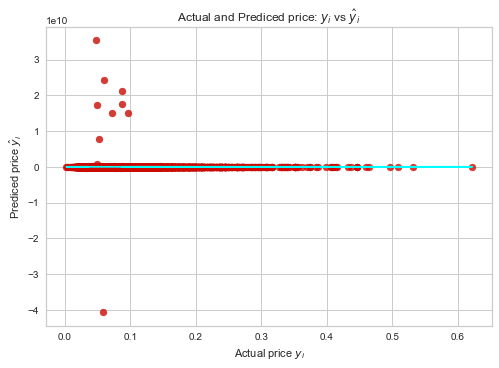

In [137]:
plt.scatter(test_y, lm.predict(test_X), color = 'r', alpha = 0.8)
plt.plot(test_y, test_y, color = 'cyan')
plt.xlabel('Actual price $y_i$')
plt.ylabel('Prediced price $\hat y_i$')
plt.title(f'Actual and Prediced price: $y_i$ vs $\hat y_i$')
plt.show()

The graph indicates model is not performing well 

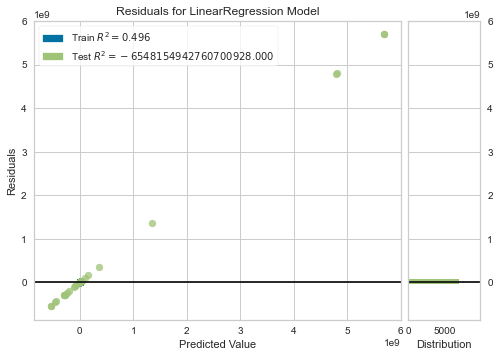

In [163]:
viz = residuals_plot(lm, train_X, train_y, test_X, test_y)

### 2.2 Apply the model for prediction with cross validation:

In [82]:
lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

In [83]:
scores = cross_val_score(lm, X, y, scoring='r2', cv = 10)
scores.mean()

-2.193728617055598e+20

R square is nagative. The accurace of model less than the mean method

### 3 Using PCA, apply the model with holdout and cross validation

### Apply PCA for model

In [165]:
X = df1.drop('Price', axis = 1)

target = ['Price']
y = df1[target]

In [166]:
scaler = MinMaxScaler()
scaler.fit(X)

pca_y = MinMaxScaler().fit(y).transform(y)

In [167]:
scaled_data = scaler.transform(X)

In [168]:
pca = PCA(n_components = 100)

In [169]:
pca.fit(scaled_data)

PCA(n_components=100)

In [170]:
x_pca = pca.transform(scaled_data) 

In [171]:
x_pca.shape

(34854, 100)

### 3.1 Apply the model for prediction with holdout

In [172]:
pcatrain_X, pcatest_X, pcatrain_y, pcatest_y = train_test_split(x_pca, pca_y, test_size = 0.2)

In [173]:
pcatrain_X.shape

(27883, 100)

In [174]:
pcatrain_y.shape

(27883, 1)

In [175]:
lm = LinearRegression()
lm.fit(pcatrain_X, pcatrain_y)

LinearRegression()

In [176]:
pcapredictions = lm.predict(pcatest_X)

In [177]:
r2 = r2_score(pcatest_y, pcapredictions)
r2

0.4038821305909571

R square is 40.16%. The accurace of model less than the mean method

Uniform distribution of the residuals against the target in two dimensions. This seems to indicate that our linear model is performing well.

### 3.2 Apply the model for prediction with cross validation

In [178]:
lm = LinearRegression()
lm.fit(x_pca, y)

LinearRegression()

In [179]:
scores = cross_val_score(lm, x_pca, y, scoring='r2', cv = 10)
scores.mean()

0.37725129221178494

R square is 37.68%. The accurace of model less than the mean method

Based on get result. The accuracy of model apply PCA good than model not apply PCA. However, the accuracy of model less than the mean method

#### Visualize the residue

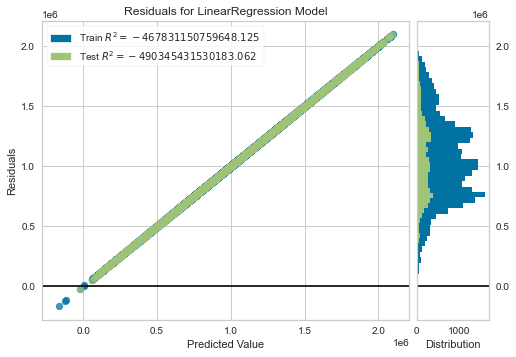

In [180]:
viz = residuals_plot(lm, pcatrain_X, pcatrain_y, pcatest_X, pcatest_y)

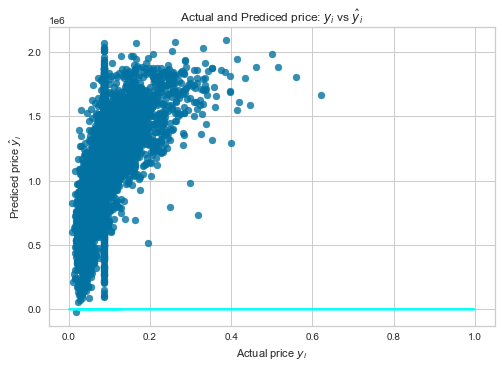

In [181]:
plt.scatter(pcatest_y, lm.predict(pcatest_X), color = 'b', alpha = 0.8)
plt.plot(pcatrain_y, pcatrain_y, color = 'cyan')
plt.xlabel('Actual price $y_i$')
plt.ylabel('Prediced price $\hat y_i$')
plt.title(f'Actual and Prediced price: $y_i$ vs $\hat y_i$')
plt.show()

### 3.3 Explain variation

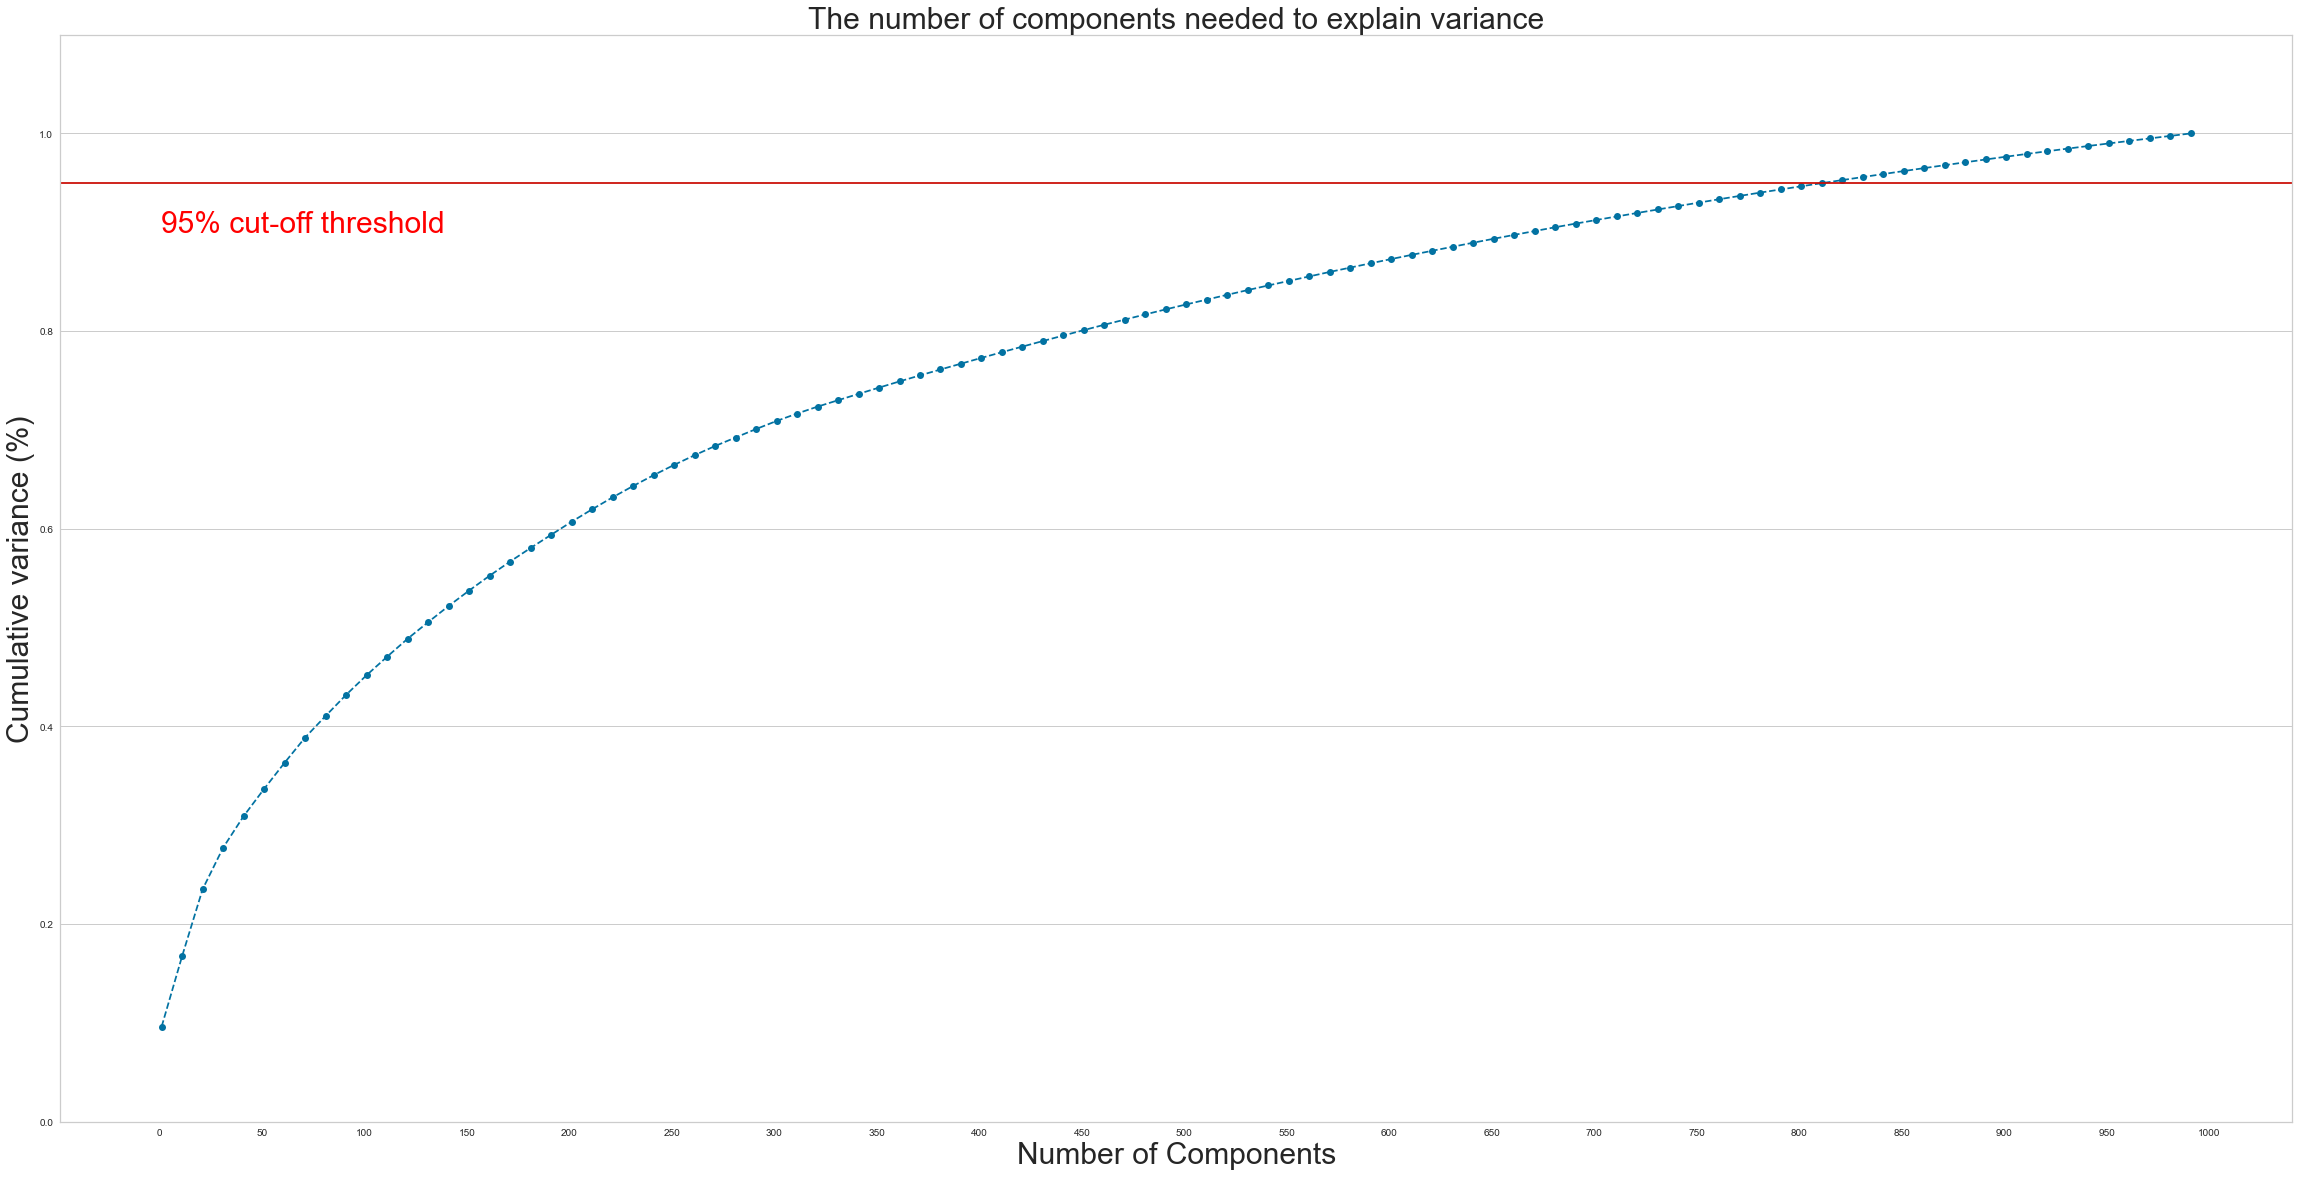

In [152]:
pca = PCA().fit(x_pca)

plt.rcParams["figure.figsize"] = (40,20)

fig, ax = plt.subplots()
xi = np.arange(1, 1000, step=10)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components', fontsize = 30)
plt.xticks(np.arange(0, 1050, step=50)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)', fontsize = 30)
plt.title('The number of components needed to explain variance', fontsize = 30)

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.90, '95% cut-off threshold', color = 'red', fontsize=30)

ax.grid(axis='x')
plt.show()

In this case, to get 95% of variance explained I need 800 principal components.